# Euro problem
Here is the solution to the ex. 4.1 from Chapter 4

**Exercise 4.1**. *Suppose that instead of observing coin tosses directly, you measure the outcome using an instrument that is not always correct. Specifically, suppose there is a probability y that an actual heads is reported as tails, or actual tails reported as heads.*

*Write a class that estimates the bias of a coin given a series of outcomes and the value of y.*

*How does the spread of the posterior distribution depend on y?*

In [22]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
import numpy as np

# Configure Jupyter to display the assigned value after an assignment
#%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite
import thinkplot

As a first step, implement the actual example in the book (i.e. y=0).
* data are 'H' or 'T'
* each hypothesis $H_{x}$ represents the scenario in which the coin has $x$ probability of heads.

In [2]:
class Euro(Suite):
    
    def Likelihood(self, data, hypo):
        
        x = hypo
        if data=='H':
            return x/100
        else:
            return 1 - (x/100)

In [3]:
suite = Euro(range(0, 101))

In [4]:
dataset = 'H'*140 + 'T'*110

In [5]:
for data in dataset:
    suite.Update(data)

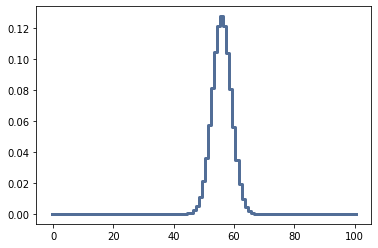

In [6]:
thinkplot.pmf(suite)

OK, things work as expected.

**Solution**  
The problem now is that data is not "H" or "T", but is a variable which has the following properties:
* P(data=T|coin=H) = y, and therefore P(data=H|coin=H) = 1-y
* P(data=H|coin=T) = y, and therefore P(data=T|coin=T) = 1-y

Given this, if we observe a given data, we then want to compute P(x|data), which is given by Bayes theorem:
$$
P(x|data) = \frac{P(data|x) \times P(x)}{\sum_{x'} ( P(data|x') \times P(x') )}
$$

In the above formula, y enters in P(data|x), i.e. in the Likelihood, as follows:
P(data|x) = 
* if data = H: P(data=H|coin=H)$\times$P(coin=H|x) + P(data=H|coin=T)$\times$P(coin=T|x)
* if data = T: P(data=T|coin=H)$\times$P(coin=H|x) + P(data=T|coin=T)$\times$P(coin=T|x)

Inserting the values of the several proability terms, we have P(data|x):
* if data = H: $(1-y)\frac{x}{100} + y(1-\frac{x}{100})$
* if data = T: $y(\frac{x}{100}) + (1-y)(1-\frac{x}{100})$

The above probabilty reduce to the simple case studied above if y=0 :)

In [10]:
class EuroBias(Suite):
    
    def setY(self, y):
        if not ((y >=0) and (y <=1)):
            raise ValueError("y has to be between 0 and 1 (both included)")
        self.y = y
    
    def Likelihood(self, data, hypo):
        
        y = self.y
        x = hypo
        if data=='H':
            return (1-y)*(x/100) + y*(1-(x/100))
        else:
            return y*(x/100) + (1-y)*(1-(x/100))

In [29]:
suites = {}
ys = np.arange(.1, 1, 0.3)

for y in ys:
    key = f'y_{y}'
    suites[key] = EuroBias(range(0,101))
    suites[key].setY(y)

In [30]:
for k, s in suites.items():
    for data in dataset:
        s.Update(data)

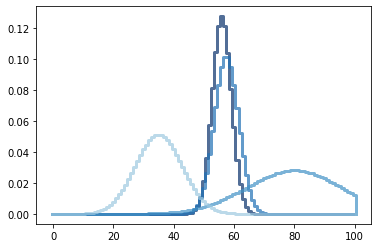

In [35]:
thinkplot.pmf(suite, label='look at the coin')
for k, s in suites.items():
    thinkplot.pmf(s, label=k)